EDTAのpHによる変化

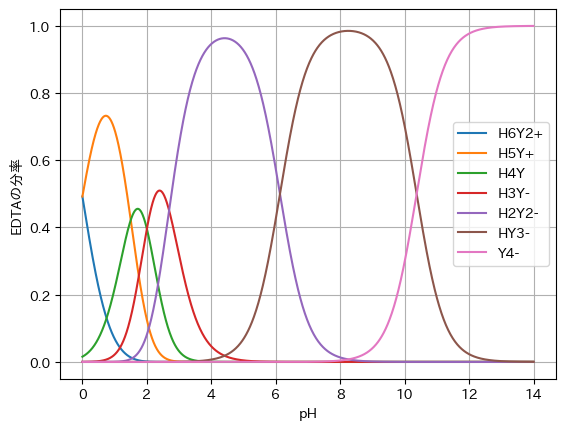

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

ka1 = 1
ka2 = 10**(-1.5)
ka3 =10**(-2.00)
ka4 = 10**(-2.69)
ka5 = 10**(-6.13)
ka6 = 10**(-10.37)

ph_values = np.arange(0, 14, 0.01)

h = 10**(-ph_values)
const = (h**6 + ka1*h**5 + ka1*ka2*h**4 + ka1*ka2*ka3*h**3 + 
         ka1*ka2*ka3*ka4*h**2 + ka1*ka2*ka3*ka4*ka5*h + 
         ka1*ka2*ka3*ka4*ka5*ka6)

a1 = h**6/const
a2 = ka1*h**5/const
a3 = ka1*ka2*h**4/const
a4 = ka1*ka2*ka3*h**3/const
a5 = ka1*ka2*ka3*ka4*h**2/const
a6 = ka1*ka2*ka3*ka4*ka5*h/const
a7 = ka1*ka2*ka3*ka4*ka5*ka6/const

plt.plot(ph_values, a1, label='H6Y2+')
plt.plot(ph_values, a2, label='H5Y+')
plt.plot(ph_values, a3, label='H4Y')
plt.plot(ph_values, a4, label='H3Y-')
plt.plot(ph_values, a5, label='H2Y2-')
plt.plot(ph_values, a6, label='HY3-')
plt.plot(ph_values, a7, label='Y4-')
plt.xlabel('pH')
plt.ylabel('EDTAの分率')
plt.grid()
plt.legend()
plt.show()

EBTのpHによる変化


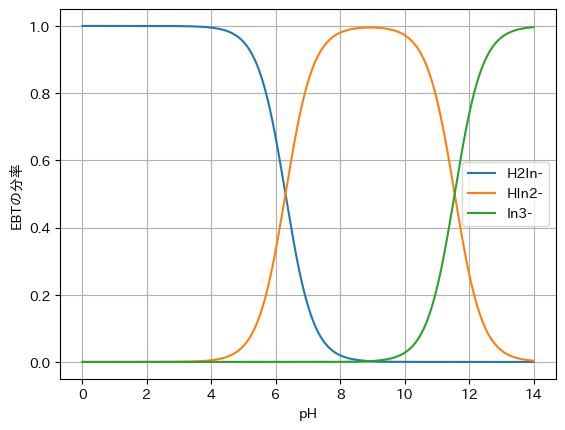

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

ka1=10**(-6.3)
ka2=10**(-11.55)

ph_values = np.arange(0, 14, 0.01)
h=10**(-ph_values)

const = h**2 + ka1*h + ka1*ka2

a1 = h**2/const
a2 = ka1*h/const
a3 = ka1*ka2/const

plt.plot(ph_values, a1, label='H2In-')
plt.plot(ph_values, a2, label='HIn2-')
plt.plot(ph_values, a3, label='In3-')
plt.xlabel('pH')
plt.ylabel('EBTの分率')
plt.grid()
plt.legend()
plt.show()

EDTA滴定における金属イオン濃度

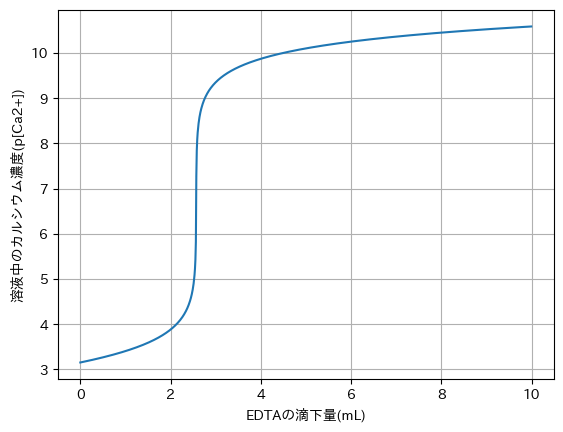

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

ka1 = 1
ka2 = 10**(-1.5)
ka3 =10**(-2.00)
ka4 = 10**(-2.69)
ka5 = 10**(-6.13)
ka6 = 10**(-10.37)

h = 10**(-10)
const = (h**6 + ka1*h**5 + ka1*ka2*h**4 + ka1*ka2*ka3*h**3 + 
         ka1*ka2*ka3*ka4*h**2 + ka1*ka2*ka3*ka4*ka5*h + 
         ka1*ka2*ka3*ka4*ka5*ka6)

a7 = ka1*ka2*ka3*ka4*ka5*ka6/const
C1=0.003
C2=70/1000/100
Kf=10**10.65
kf2=Kf*a7
init_V=11/1000
V_list=np.arange(0, 10, 0.01)
V_l=[]
ans_list=[]
for v in V_list:
    V=v/1000
    V_total=init_V+V
    coeffs=[V_total*kf2, (V_total + kf2*(C1*V-C2*init_V)), -C2*init_V]
    roots = np.roots(coeffs)
    ans= -np.log10(roots[roots>0])
    ans_list.append(ans[0])
    V_l.append(v)
plt.plot(V_l, ans_list)
plt.xlabel('EDTAの滴下量(mL)')
plt.ylabel('溶液中のカルシウム濃度(p[Ca2+])')
plt.grid()
plt.show()
    



マグネシウム混合条件

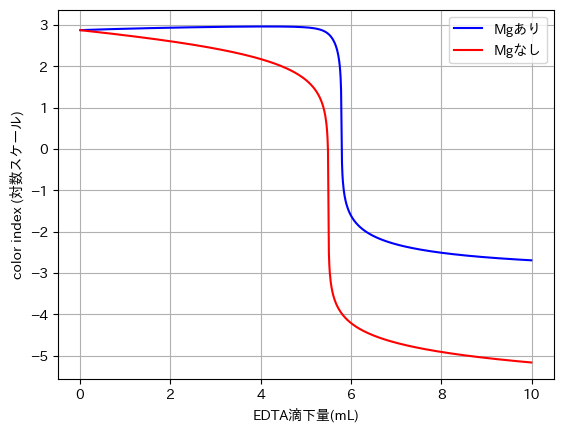

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

ka1 = 1
ka2 = 10**(-1.5)
ka3 =10**(-2.00)
ka4 = 10**(-2.69)
ka5 = 10**(-6.13)
ka6 = 10**(-10.37)

h = 10**(-10)
const = (h**6 + ka1*h**5 + ka1*ka2*h**4 + ka1*ka2*ka3*h**3 + 
         ka1*ka2*ka3*ka4*h**2 + ka1*ka2*ka3*ka4*ka5*h + 
         ka1*ka2*ka3*ka4*ka5*ka6)

a7 = ka1*ka2*ka3*ka4*ka5*ka6/const

C1=0.02
C2=0.01
C3=0.001

Kf1=10**10.65
Kf2=10**8.79
k1=Kf1*a7
k2=Kf2*a7

Kebt1_1=10**5.4
Kebt2_1=10**7.0
Kebt1=Kebt1_1*a7
Kebt2=Kebt2_1*a7

init_V=11/1000
V_list=np.arange(0, 10, 0.01)
V_l=[]
color_list=[]
for v in V_list:
    V=v/1000
    V_total=init_V+V
    A=init_V*C2/V_total
    B=V*C3/V_total
    C=V*C1/V_total
    coeffs=[k1*k2, (k1+k2+k1*k2*A+k1*k2*B-k1*k2*C), (1+k1*A+k2*B-k1*C-k2*C), -C]
    roots = np.roots(coeffs)
    L = roots[roots > 0]
    if L.size > 0:
        Ca = A / (1 + k1 * L)
        Mg = B / (1 + k2 * L)
        color = Kebt1 * Ca + Kebt2 * Mg
        log_color = np.log10(color)
        color_list.append(log_color[0])
    else:
        color_list.append(np.nan)
    V_l.append(v)

C3=0
V_l2=[]
color_list2=[]
for v in V_list:
    V=v/1000
    V_total=init_V+V
    A=init_V*C2/V_total
    B=V*C3/V_total
    C=V*C1/V_total
    coeffs=[k1*k2, (k1+k2+k1*k2*A+k1*k2*B-k1*k2*C), (1+k1*A+k2*B-k1*C-k2*C), -C]
    roots = np.roots(coeffs)
    L = roots[roots > 0]
    if L.size > 0:
        Ca = A / (1 + k1 * L)
        Mg = B / (1 + k2 * L)
        color = Kebt1 * Ca + Kebt2 * Mg
        log_color = np.log10(color)
        color_list2.append(log_color[0])
    else:
        color_list2.append(np.nan)
    V_l2.append(v)
    

plt.plot(V_l, color_list, color='blue', label='Mgあり')
plt.plot(V_l2, color_list2, color='red', label='Mgなし')
plt.xlabel('EDTA滴下量(mL)')
plt.ylabel('color index (対数スケール)')
plt.grid()
plt.legend()
plt.show()
    
